<a target="_blank" href="https://colab.research.google.com/github/ProgrammierenNachOFI/Investitionsrechnung/blob/breakeven/docs/break_even/break_even_muloe.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Break Even Point (Nutzschwelle)

Die Berechnung der Nutzschwelle (Break Even Point) soll am Beispiel von
Mobilitätskosten dargestellt werden. Es werden dazu auf Preise im
Februar 2024 abgestellt.  
Verglichen werden die Kosten eines Kleinwagens mit jenen des
öffentlichen Verkehrs mit einem Halbtax- bzw. Generalabbonement.

## Ausgangslage

### Kosten Kleinwagen

Basierend auf den
[Angaben des TCS vom Februar 2024](https://www.tcs.ch/de/testberichte-ratgeber/ratgeber/kontrollen-unterhalt/kilometerkosten.php)
fallen für einen Kleinwagen mit einem Neupreis von CHF 41'000 bei einer Fahrleistung von 15'000km die folgenden Kosten an:

| Musterauto |  | Kostensituation |
| :--- | :---  |---: |
| Jährliche Laufleistung | km | 15'000 |
| Nutzungsdauer | Jahre |10 |
| Amortisation | CHF | 2'897 |
| Parkkosten | CHF | 1'716 |
| Versicherungen | CHF | 966|
| Diverses | CHF | 966 |
| Total Fixkosten | CHF | 6'545 |
| Nutzungsbedingte Werverminderung | CHF | 1'180 |
| Treibstoffkosten | CHF | 1'502|
| Reifenkosten | CHF | 429 |
| Reparaturkosten | CHF | 1'073 |
| Total variable Kosten | CHF | 4'184 |
| Kosten pro km | CHF | 0.28 |

### Kosten Halbtax

Ein Halbtax der SBB
[kostet für einen Neukunden im Februar 2024](https://www.sbb.ch/de/billette-angebote/abos/halbtax.html)
CHF 190.

Unklar sind die Kilometerpreise der SBB. Eine Überschlagsrechnung,
basierend auf den Billettpreisen und den Strecken gemäss Karte, führt zu
einem Kilometerpreis von CHF 0.45 für ein Billett erster Klasse.

### Kosten Generalabonnement

Ein Generalabonnement erster Klasse
[kostet im Februar 2024](https://www.sbb.ch/de/billette-angebote/abos/ga/ga-preise.html)
CHF 6'520.

## Mathematische Überlegungen zur Berechnung des Break Even Points

Der Break Even Point bzw. die Nutzschwelle fragt nach der Anzahl von
Einheiten (im Beispiel km), ab welcher eine Variante finanziell einer Vergleichsvariante vorzuziehen ist.

Dazu werden die Kostentwicklungen in Abhängigkeit der fraglichen Einheit der beiden Varianten als Funktionen
dargestellt. Der Einfachheit halber wird hier auf eine lineare Funktion vom Typ $f(x)=mx+b$ abgestellt. 
Diese Funktionen werden dann einander gleichgesetzt und
nach der gesuchten Einheit aufgelöst.

Für das Halbtaxabonnement sieht die Kostenfunktion $k(km)$ gestützt auf die oben dargestellten Daten folgendermassen aus:

$$k_{halbtax}(km) = 0.45 \cdot km + 190$$

Für das Auto ergibt sich aus der der obigen Zusammenstellung die
folgende Kostenfunktion:

$$k_{auto}(km) = 0.28 \cdot km + 6545$$

Wenn die beiden Funktionen einander gleichgesetzt werden, sieht das
folgendermassen aus:

$$
\begin{aligned}
0.45 \cdot km + 190 &=& 0.28 \cdot km + 6'545\\
0.17 \cdot km &=& 6'355\\
km &=& 37'382\\
\end{aligned}
$$

In der Folge geht es darum, die Gleichung mit Python zu lösen und die Lösung grafisch darzustellen.

## Erforderliche Python Libraries

Um die Resultate grafisch darstellen zu können, wird auf die Python
Library
[`matplotlib`](https://matplotlib.org/)
abgestellt. Für das automatisierte Lösen von Gleichungen wird die Python Library
[`sympy`](https://www.sympy.org/en/index.html)
verwendet.

In [1]:
import matplotlib.pyplot as plt
import sympy as sp


In einer ersten Phase werden die einzelnen Berechnungen Schritt für
Schritt vorgenommen. In einer zweiten Phase können diese dann in einer
Python Klasse zusammengefügt werden.

## Vorgehen Schritt für Schirtt

### Rechnerische Lösung

Die Python Librarie `sympy` ermöglicht die automatisierte Lösung von
Gleichungen. Dazu muss mit der Funktion `sympy.symbols()` definert
werden, nach welcher Variabel die Gleichung aufgelöst werden soll (`x =
sp.symbols('x')` im Beispiel). Anschliessend muss die Gleichung erfasst
werden. Dies geschieht mit `sympy.Eq(x,y)`, wobei `x` und `y` die Terme
links und rechts des Gleichheitsszeichens darstellen.  
Mit `sympy.solve(gleichung, x)` wird die Gleichung nach `x` aufgelöst (Achtung: damit wird eine Liste von Resultaten erzeugt!).

In [2]:
x = sp.symbols('x')                    # Definition der Variable 
                                       # nach der die Gleichung aufgelöst wird
gleichung = sp.Eq(0.45*x+190,          # Kostenfunktion Halbtax
                  0.28*x+6545)         # Kostenfunktion Auto
bep = sp.solve(gleichung, x)           # Lösung der Gleichung
break_even_point = bep[0]              # Zuweisung der Lösung an break_even_point
print(break_even_point)

37382.3529411765


Bis zu einer Distanz von 37'382 km ist es günstiger mit der Eisenbahn zu reisen. Um dieses Resultat anschaulicher zu machen, wird im folgenden Abschnitt eine grafische Lösung erstellt.

### Grafische Lösung

Für die grafische Lösung brauchen wir Wertelisten, die wir gegeneinander Plotten können. Das heisst wir brauchen für die x-Achse eine Liste von Kilometerwerten und für die y-Achse daraus abgeleitete Kosten für das Auto bzw. die Eisenbahn.

In [4]:
km = [i for i in range(50_000)]          # km-Liste, wobei das Maximum grösser
                                         # als der Break Even Point sein muss
k_sbb = [0.45 * i + 190 for i in km]     # Kostenfunktion für das Halbtax
k_auto = [0.28 * i + 6_545 for i in km]  # Kostenfunktion für das Auto

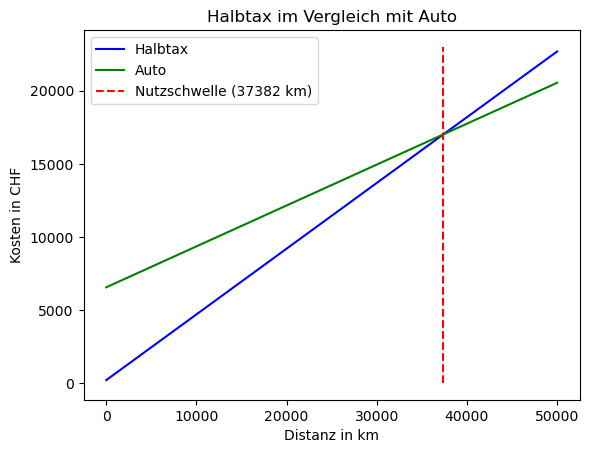

In [7]:
plt.plot(km, k_sbb, color='blue',       # Plot der Kostenfunktion Halbtax
         label='Halbtax')     
plt.plot(km, k_auto, color='green',     # Plot der Kostenfunktion Auto
         label='Auto')       
plt.vlines(break_even_point, ymin=0,    # Darstellung der Nutzschwelle
           ymax=23_000, colors='red',
           linestyle='dashed',
           label=f'Nutzschwelle ({round(break_even_point)} km)')
plt.title(f'Halbtax im Vergleich mit Auto')
plt.xlabel('Distanz in km')
plt.ylabel('Kosten in CHF')
plt.legend()
plt.show()

In der grafischen Darstellung der Nutzschwelle sieht man, dass bis zur Nutzschwelle das Auto (grüne Kurve) höhere Kosten als die Eisenbahn (blaue Kurve) verursacht.

## Verallgemeinerte Berechnung der Nutzschwelle

Damit die Nuztschwell allgemein, dh. bei einer Gegenüberstellung beliebiger Varianten, berechnet werden kann, kann dafür eine Python Klasse geschrieben werden. Als Vorbereitung dafür ist ein UML-Klassendiagramm zu skizzieren.

Ausgehend von der manuellen Lösung sollte die Klasse eine Methode für die Berechnung der Nutzschwelle sowie eine zur grafischen Darstellung der Nutzschwelle zur Verfügung stellen. Aus diesen beiden Methoden kann nun abgeleitet werden, welche Attribute die Klasse dazu braucht. Aus den obigen Berechnungen ergibt sich, dass das Objekt Attribute für die Fixkosten sowie die variablen Kosten braucht. Ausserdem wäre es für die grafische Darstellung hilfreich, über Attribute für den Titel sowie den Kostentreiber zu verfügen. Zusätzlich kann es hilfreich sein, wenn die Kostenfunktion eines einzelnen Objekts geplottet werden kann.

Die hier dargestellte Klasse kann nun implementiert werden. Dabei besteht ein erheblicher Spielraum, wie die drei Methoden implementiert werden.

Weil oben aber bereits eine "manuelle" Lösung erarbeitet worden ist, ist die effizienteste Vorgehensweise wohl die Übernahme des bereits geprüften Codes in die zu implementiertende Klasse.

In [10]:
class BEO1:
    def __init__(self,
                 titel : str,
                 kostentreiber : str,
                 v_kosten : float,
                 f_kosten : float = 0):
        """
        Initialisiert eine neue Instanz der BEO1-Klasse.

        :param titel: Der Titel des Objekts, zur Identifizierung in Plots.
        :param kostentreiber: Der Name der Kostentreiber-Variable,
                              z.B. 'km' für Kilometer.
        :param v_kosten: Variable Kosten pro Einheit des Kostentreibers.
        :param f_kosten: Fixe Kosten, standardmäßig auf 0 gesetzt.
        """

        self.titel = titel
        self.kostentreiber = kostentreiber
        self.v_kosten = v_kosten
        self.f_kosten = f_kosten

    def break_even_point(self, other):
        """
        Berechnet den Break-Even-Point zwischen zwei BEO1-Objekten.

        :param other: Ein anderes BEO1-Objekt, mit dem verglichen wird.
        :return: Der Break-Even-Point als Lösung der Gleichung.
        """

        x = sp.symbols('x')
        gleichung = sp.Eq(self.v_kosten * x + self.f_kosten,
                          other.v_kosten * x + other.f_kosten)

        bep = sp.solve(gleichung, x)

        return bep[0]

    def plot_vergleich(self, other):
        """
        Erstellt einen Vergleichsplot zweier BEO1-Objekte
        und zeigt den Break-Even-Point.

        :param other: Ein anderes BEO1-Objekt, mit dem verglichen wird.
        """

        bep = self.break_even_point(other)

        # Bestimme die obere Grenze des Plots
        if bep > 0:
            maximum = max(int(2 * bep), 10)
        else:
            bep = 0
            maximum = 100

        # Berechne y-Werte für beide Objekte
        x_werte = [i for i in range(maximum)]
        y_self = [self.v_kosten * x + self.f_kosten for x in x_werte]
        y_other = [other.v_kosten * x + other.f_kosten for x in x_werte]

        # Bestimme das Maximum für die y-Achse
        kombi = y_self + y_other
        max_value = max(kombi)

        # Erstelle den Plot
        plt.plot(x_werte, y_self, label=self.titel)
        plt.plot(x_werte, y_other, label=other.titel)

        # Zeichne die Nutzschwelle
        plt.vlines(bep, ymin=0,
                ymax=max_value,
                colors='red', linestyle='dashed',
                label=f'Nutzschwelle ({round(bep)} km)')

        # Beschriftung und Darstellung des Plots
        plt.title(f'{self.titel} im Vergleich mit {other.titel}')
        plt.xlabel(self.kostentreiber)
        plt.ylabel('CHF')
        plt.legend()
        plt.show()



    def plot_kosten(self):
        """
        Erstellt einen Plot des Kostenverlaufs für das BEO1-Objekt.
        """

        maximum = 200

        x_werte = [i for i in range(maximum)]
        y_self = [self.v_kosten * x + self.f_kosten for x in x_werte]

        plt.plot(x_werte, y_self, label=self.titel)
        plt.title(f'Kostenverlauf {self.titel}')
        plt.xlabel(self.kostentreiber)
        plt.ylabel('CHF')
        plt.legend()
        plt.show()

Bis 30262km ist das Reisenmit einem Halbtax günstiger.


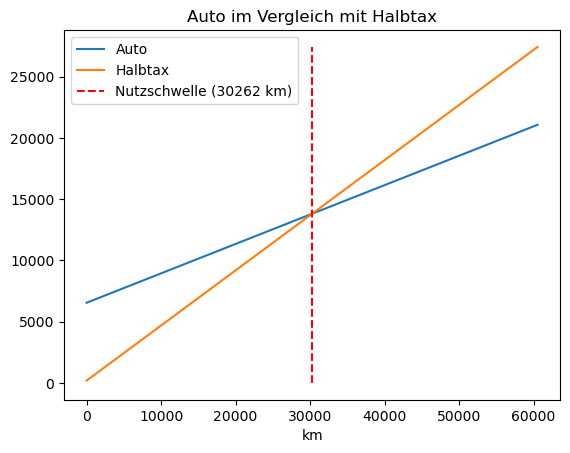

In [9]:
halbtax = BEO1('Halbtax', 'km', 0.45, 190)
auto = BEO1('Auto', 'km', 0.24, 6_545)
ga = BEO1('Generalabonnement', 'km', 0.0, 6_520)

break_even = auto.break_even_point(halbtax)
print(f'Bis {round(break_even)}{halbtax.kostentreiber} ist das Reisen', end='')
print(f'mit einem {halbtax.titel} günstiger.')
auto.plot_vergleich(halbtax)